KNN without sklearn

In [72]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('data.csv')
df.replace("Good", 1.0, inplace = True)
df.replace("Bad", 0.0, inplace = True)

X = df.drop(columns=['Classification'])
Y = df['Classification']

from scipy.stats import mode
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
def predict(x_train, y , x_input, k):
    op_labels = []
    for item in x_input: 
        point_dist = []
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train.iloc[j,:]) , item) 
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
        dist = np.argsort(point_dist)[:k] 
        labels = y[dist]
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels



In [73]:
predict(X, Y,[(3,7)], 4)

<ipython-input-72-2e4f7c3d2f5c>:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lab = mode(labels)


[0]

In [74]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X.values,Y.values)
neigh.predict(np.array([3,7]).reshape(1,-1))


array([0])

In [75]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X.values,Y.values)
neigh.predict(np.array([3,7]).reshape(1,-1))

array([0])

In [76]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X.values,Y.values)
neigh.predict(np.array([3,7]).reshape(1,-1))

array([0])

In [69]:
pltB = np.array(df.loc[df['Classification'] == 0].drop(columns=['Classification']))
pltG =  np.array(df.loc[df['Classification'] == 1].drop(columns=['Classification']))

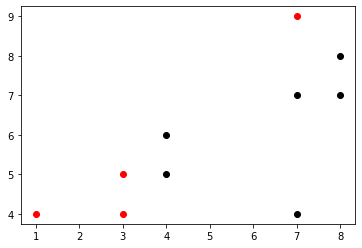

In [70]:
import matplotlib.pyplot as plt
plt.scatter(pltB[:,0], pltB[:,1], color='k')
plt.scatter(pltG[:,0], pltG[:,1], color='r')


0 3 9 10
<class 'numpy.ndarray'>


/home/Student/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: Image data of dtype object cannot be converted to float

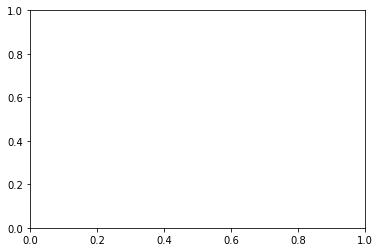

In [71]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 2

h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)
    x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    print(x_min, y_min, x_max, y_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print(type(xx.astype(float)))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z.reshape(xx.shape))
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=Y, cmap=cmap_bold)
plt.show()

KNN with sklearn

ValueError: s must be a scalar, or float array-like with the same size as x and y

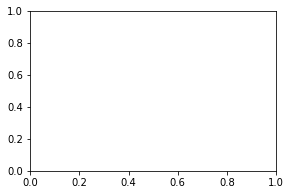

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define the training samples and their labels
X_train = np.array([
    [7, 7],
    [7, 4],
    [3, 4],
    [1, 4],
    [4, 5],
    [3, 5],
    [4, 6],
    [8, 7],
    [7, 9],
    [8, 8]
])

y_train = np.array(["Bad", "Bad", "Good", "Good", "Bad", "Good", "Bad", "Bad", "Good", "Bad"])

# Create a KNN classifier with different distance metrics
k_values = [2, 3, 4]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Create a mesh grid for decision boundary
h = 0.1
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary for different K values and distance metrics
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    for j, metric in enumerate(distance_metrics):
        plt.subplot(3, 3, i * len(distance_metrics) + j + 1)

        # Create and fit the KNN classifier
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        clf.fit(X_train, y_train)

        # Predict and classify each point in the mesh grid
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        plt.scatter(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8)

        # Plot the training samples
        plt.scatter(X_train[:, 0], X_train[:, 1], c=[1 if label == 'Good' else 0 for label in y_train], cmap=plt.cm.RdYlGn)
        
        plt.xlabel(f"K={k}, {metric.capitalize()}")
        plt.ylabel("Strength (kg/square meter)")
        plt.title(f"Decision Boundary")

plt.show()

SVM

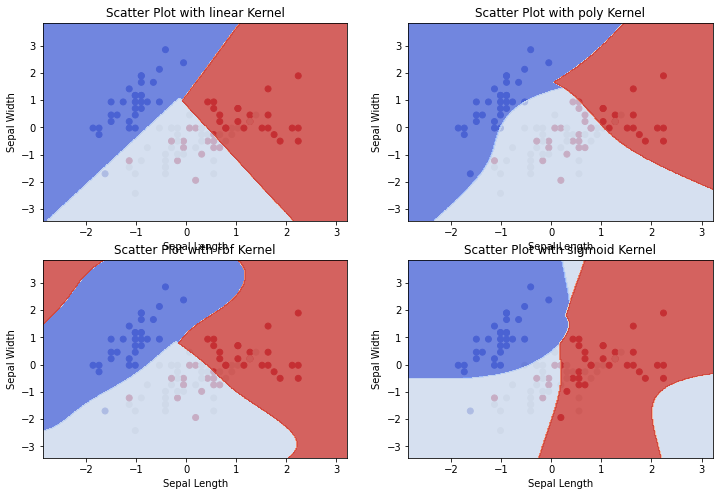

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for visualization
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classifiers = {}

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    classifiers[kernel] = clf

# Plot the scatter plot of the input features
plt.figure(figsize=(12, 8))

for i, kernel in enumerate(kernels):
    plt.subplot(2, 2, i + 1)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(f'Scatter Plot with {kernel} Kernel')

    # Create a mesh grid to plot the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifiers[kernel].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.show()